# DM954 Assignment

In [2]:
import pandas as pd #for tabular data
import numpy as np #for advanced mathematics and complex operations involving arrays
import sklearn #for machine learning and processing of the data
import seaborn as sns #for data visualisation 
import matplotlib.pyplot as plt #for data visualisation
from sklearn.linear_model import LinearRegression 
from scipy.stats import linregress

## 1. Exploratory data analysis 

In [4]:
#load the data 
df= pd.read_csv("/Users/barbarawerobaobayi/Documents/Strathclyde/intelligent systems /Code for Laboratory 1 - Linear Regression-20251011/dirty_regression_data.csv")
#preview data
df.head()

,x,y
0,0.000000,0.239432
1,0.505051,9.798348
2,1.010101,3.787463
3,1.515152,8.015536
4,2.020202,NaN


In [5]:
# understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       90 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
#Summary of numeric columns
df.describe()

,x,y
count,100.000000,90.000000
mean,25.000000,54.695947
std,14.652269,28.882242
min,0.000000,0.239432
25%,12.500000,29.731151
50%,25.000000,53.899423
75%,37.500000,80.807482
max,50.000000,106.439067


### 1.1 Checking for Outliers

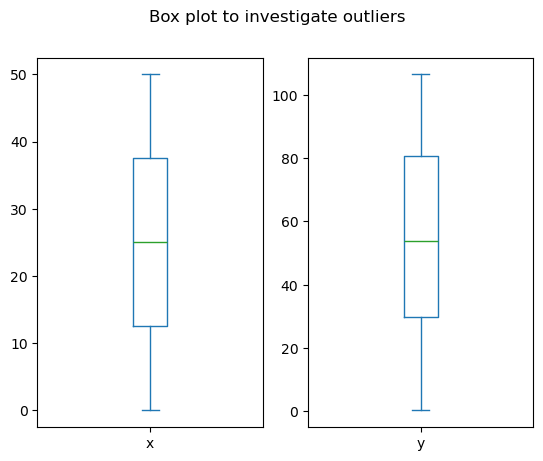

In [8]:
#plot box plot
df.plot(kind="box", subplots=True)
plt.suptitle("Box plot to investigate outliers")
plt.show()

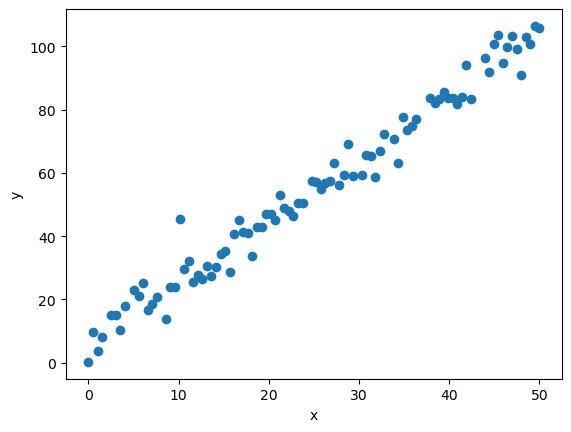

In [9]:
#plot scatter plot 
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1.2 Checking for missing and duplicate values

In [11]:
df.isna().sum()

x     0
y    10
dtype: int64

In [12]:
df.duplicated().any()

False

### 1.3 Investigating Missingness

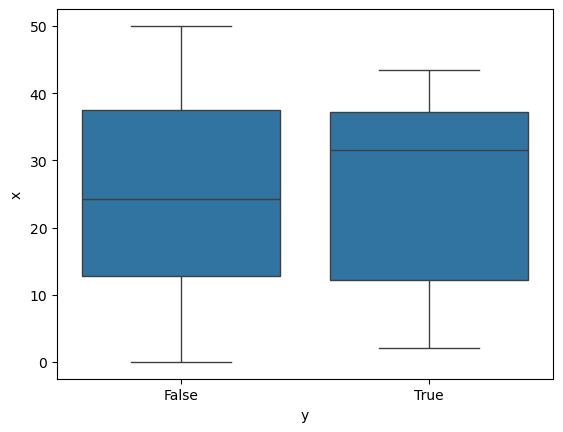

In [14]:
#checking whether y missing values depend on x 
sns.boxplot(x=df['y'].isna(), y=df['x'])
plt.show()

### 1.4 Dealing with missing values 

In [16]:
#cleaning and saving data
df_clean= df.dropna(subset=['y'])
df_clean.to_csv("treated_set.dat", index= False) 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       90 non-null     float64
 1   y       90 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


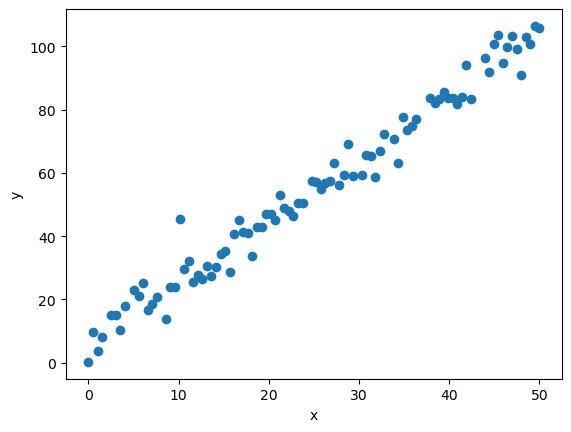

In [17]:
#Plot scatter plot
plt.scatter(df_clean['x'],df_clean['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

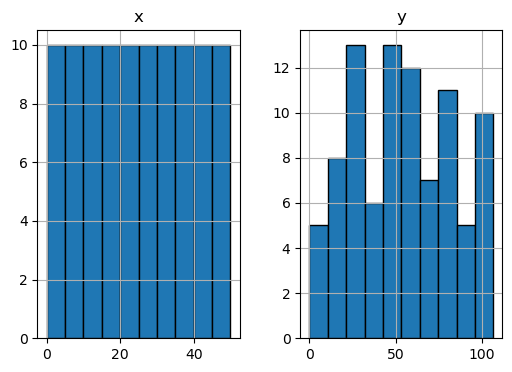

In [18]:
#plot histogram
df.hist(figsize=(6,4), bins= 10,  edgecolor= "black")
plt.subplots_adjust (wspace= 0.3 ) #using only wspace cuz it's just two variables
plt.show()

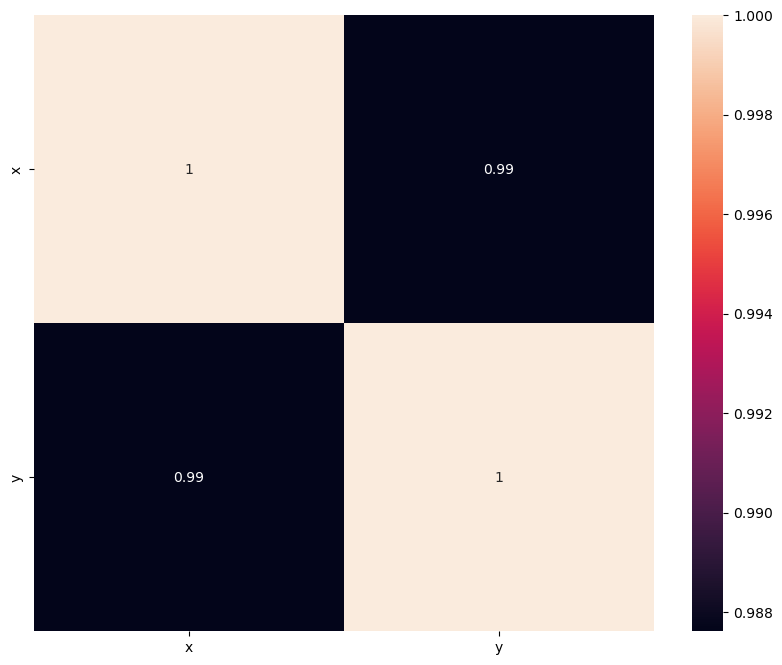

In [19]:
#calculate the correlation matrix and visualise it as a heatmap
cor= df.corr()
plt.rcParams['figure.figsize']= (10,8)
sns.heatmap(cor, xticklabels= cor.columns.values, yticklabels= cor.columns.values, annot= True)
plt.show()

## 2. Linear regression

In [21]:
#load and preview clean data
treated_set= pd.read_csv("treated_set.dat")
treated_set.head()

,x,y
0,0.000000,0.239432
1,0.505051,9.798348
2,1.010101,3.787463
3,1.515152,8.015536
4,2.525253,15.205957


### Linear regression using OLS

In [23]:
x = treated_set['x'].to_numpy(dtype=float)
y = treated_set['y'].to_numpy(dtype=float)
#regression y= a+ bx to find the coefficients a and b
#calculate the mean of the two columns 
x_mean = x.mean()
y_mean = y.mean()

b = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
a = y_mean - b * x_mean
print('custom regression coefficients', a, b)

custom regression coefficients 6.12680024665719 1.9537295529425687


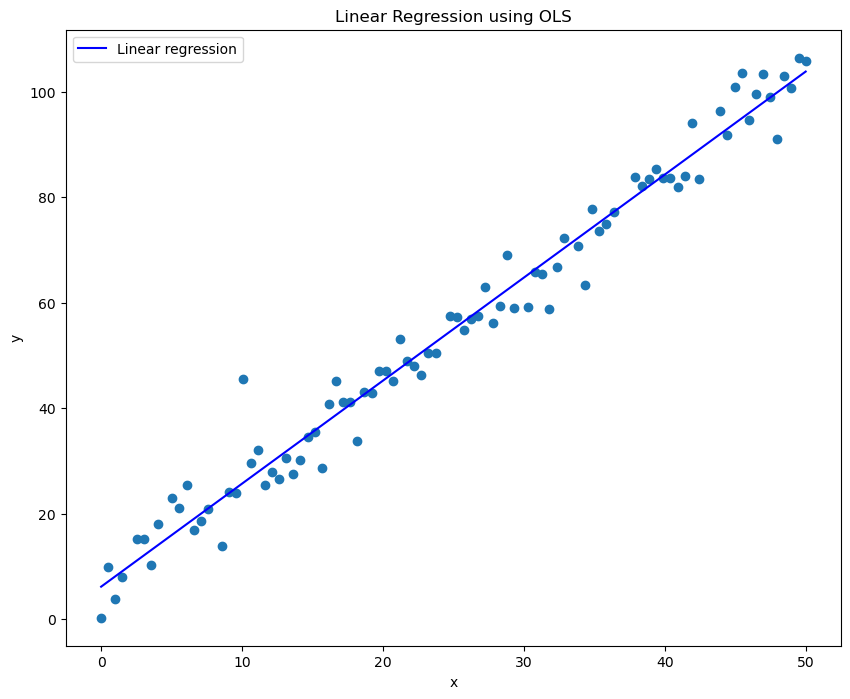

In [24]:
#plotting the values
x_max= np.max(treated_set['x'])
x_min= np.min(treated_set['x'])

x=np.linspace(x_min,x_max, 100)
y= a + b*x
#plotting the line 
plt.plot(x,y, color= '#0000ff', label= 'Linear regression')

plt.scatter(df_clean['x'],df_clean['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using OLS')
plt.show()

#### Manual calculation of R-squared

In [26]:
# actual y values
y_actual = treated_set['y'].to_numpy()
# predicted y values 
y_pred = a + b * treated_set['x'].to_numpy()
# mean of actual y
y_mean = np.mean(y_actual)
# total sum of squares
SS_tot = np.sum((y_actual - y_mean)**2)
# residual sum of squares
SS_res = np.sum((y_actual - y_pred)**2)
# R-squared
R2_manual = 1 - (SS_res / SS_tot)

print("Manual R-squared:", R2_manual)


Manual R-squared: 0.9753868830511215


### Linear regression with Sklearn

sklearn regression coefficients:
Intercept (a): 6.126800246657162
Slope (b): 1.9537295529425698


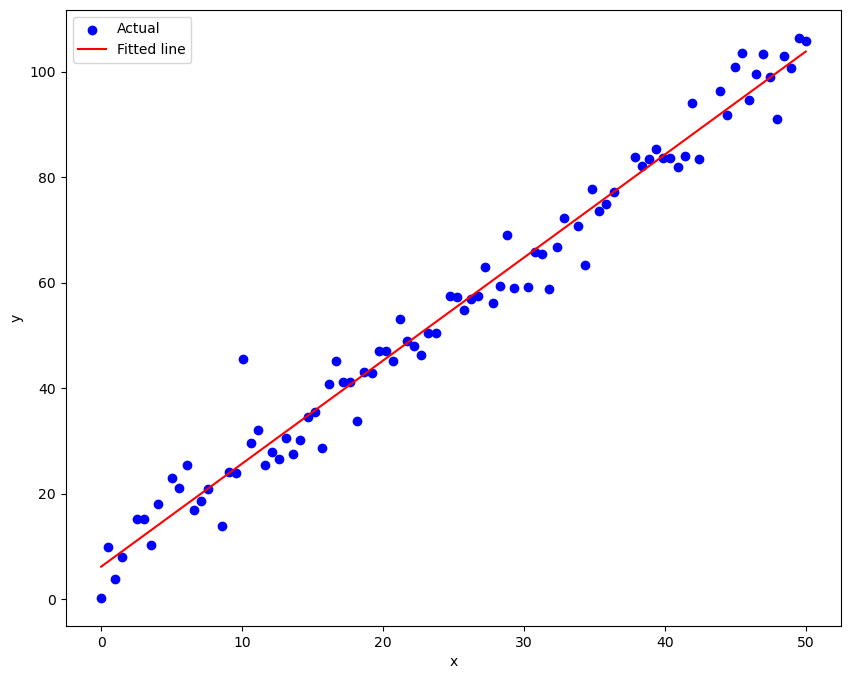

In [28]:
# separate features (x) and target (y)
X = treated_set[['x']]   # double brackets to make it a 2D array
y = treated_set['y']

# create and fit the model
model = LinearRegression()
model.fit(X, y)

# get coefficients
a = model.intercept_
b = model.coef_[0]

print('sklearn regression coefficients:')
print('Intercept (a):', a)
print('Slope (b):', b)

#make predictions and plot
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Linear regression with SciPy stats.linregress

In [30]:
from scipy import stats

# perform linear regression
result = stats.linregress(treated_set['x'], treated_set['y'])

# print results
print("Slope (b):", result.slope)
print("Intercept (a):", result.intercept)
print("R-squared:", result.rvalue**2)
print("p-value:", result.pvalue)
print("Standard error:", result.stderr)

Slope (b): 1.953729552942568
Intercept (a): 6.126800246657204
R-squared: 0.9753868830511209
p-value: 1.3966445521557975e-72
Standard error: 0.03308399617632642
